In [5]:
import os
import sys
sys.path.insert(0, "/home/qiyuan/sp/mitsuba3/build/python")

import mitsuba as mi
import drjit as dr

from typing import Union
import matplotlib.pyplot as plt
import numpy as np


print("Loaded Mitsuba from: ", os.path.dirname(mi.__file__))
print("Loaded Mitsuba from: ", os.path.dirname(dr.__file__))

mi.set_variant("cuda_ad_rgb")
dr.set_log_level(dr.LogLevel.Trace)
mi.set_log_level(mi.LogLevel.Trace)

scene_path = "/home/qiyuan/sp/mitsuba3/notebooks/bspline_curve.xml"
scene = mi.load_file(scene_path)

Loaded Mitsuba from:  /home/qiyuan/sp/mitsuba3/build/python/mitsuba
Loaded Mitsuba from:  /home/qiyuan/sp/mitsuba3/build/python/drjit


2022-11-14 14:21:16 INFO main [xml.cpp:1405] Loading XML file "/home/qiyuan/sp/mitsuba3/notebooks/bspline_curve.xml" with variant "cuda_ad_rgb"..

jit_var_new(uint32 r799): <0x302018600>
jit_var_new(uint32 r800): <0x304018c00>
jit_var_new(uint64 r801): literal = 15726070495360670683
jit_var_new(uint64 r802): literal = 9600629759793949339
jit_var_new(uint64 r436): literal = 0 (cse hit)
jit_var_new(uint64 r436): literal = 0 (cse hit)
jit_var_new(uint64 r439): literal = 1 (cse hit)
jit_var_new(uint32 r803): literal = 0
jit_var_new(uint64 r436): literal = 0 (cse hit)
jit_var_new(uint64 r436): literal = 0 (cse hit)
jit_var_new_op(uint64 r436 <- fmadd r436, r439, r436): literal
jit_var_new(uint64 r801): literal = 15726070495360670683 (cse hit)
jit_var_new_op(uint64 r801 <- add r801, r436): literal
jit_var_new(uint64 r439): literal = 1 (cse hit)
jit_var_new(uint64 r804): literal = 13005396917011789750
jit_var_new_op(uint64 r804 <- shl r801, r439): literal
jit_var_new(uint64 r439): literal = 1 (cse hit)
jit_var_new(uint64 r805): literal = 13005396917011789751
jit_var_new_op(uint64 r805 <- or r804, r439): literal
jit_var_new(uint64 r442):

2022-11-14 14:21:16 DEBUG main [PluginManager] Loading plugin "plugins/bspline.so" ..

jit_var_new(float32 r1031): literal = 1
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r1031): literal = 1 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): l

2022-11-14 14:21:16 DEBUG main [BSpline] Loading a bspline curve file from "bspline_sample_1.txt" ..

2022-11-14 14:21:16 TRACE main [MemoryMappedFile] Mapped "bspline_sample_1.txt" into memory (68 B)..

2022-11-14 14:21:16 DEBUG main [BSpline] Loaded a control point [-1.5, -3.5, 0] with radius 0.010000

2022-11-14 14:21:16 DEBUG main [BSpline] Loaded a control point [-1, 0.5, 3] with radius 0.400000

2022-11-14 14:21:16 DEBUG main [BSpline] Loaded a control point [1, 0.5, 3] with radius 0.400000

2022-11-14 14:21:16 DEBUG main [BSpline] Loaded a control point [1.5, -3.5, 0] with radius 0.400000

2022-11-14 14:21:16 DEBUG main [BSpline] Loaded a control point [0, 10, 0] with radius 0.010000

jit_var_new(float32 r1033[20]): <0x304026000>
jit_var_mem_copy(float32 r1033[20] <- <0x5caa020>)
jit_var_new(uint32 r1034[2]): <0x304026200>
jit_var_mem_copy(uint32 r1034[2] <- <0x5ad7e30>)
jit_var_new(float32 r1035[15]): <0x304026400>
jit_var_mem_copy(float32 r1035[15] <- <0x5ad7e70>)
jit_var_new(float32 r1036[5]): <0x304026600>
jit_var_mem_copy(float32 r1036[5] <- <0x5c02a00>)


2022-11-14 14:21:16 DEBUG main [BSpline] "bspline_sample_1.txt": read 5 control points (160 B in 5ms)

jit_var_new(float32 r1037): literal = 1
jit_var_copy(r1037 <- r1031)
jit_var_eval_literal(r1037): writing float32 literal of size 1
jit_var_new(float32 r1038): literal = 0
jit_var_copy(r1038 <- r268)
jit_var_eval_literal(r1038): writing float32 literal of size 1
jit_var_new(float32 r1039): literal = 0
jit_var_copy(r1039 <- r268)
jit_var_eval_literal(r1039): writing float32 literal of size 1
jit_var_new(float32 r1040): literal = 0
jit_var_copy(r1040 <- r268)
jit_var_eval_literal(r1040): writing float32 literal of size 1
jit_var_new(float32 r1041): literal = 0
jit_var_copy(r1041 <- r268)
jit_var_eval_literal(r1041): writing float32 literal of size 1
jit_var_new(float32 r1042): literal = 1
jit_var_copy(r1042 <- r1031)
jit_var_eval_literal(r1042): writing float32 literal of size 1
jit_var_new(float32 r1043): literal = 0
jit_var_copy(r1043 <- r268)
jit_var_eval_literal(r1043): writing float32 literal of size 1
jit_var_new(float32 r1044): literal = 0
jit_var_copy(r1044 <- r268)
jit_var_eval_

2022-11-14 14:21:16 TRACE main [MemoryMappedFile] Unmapping "/home/qiyuan/sp/mitsuba3/notebooks/data_samples/bspline_sample_1.txt" from memory

jit_var_new(float32 r1101): literal = 1
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r1101): literal = 1 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): literal = 0 (cse hit)
jit_var_new(float32 r268): l

2022-11-14 14:21:16 INFO main [Scene] Building scene in OptiX ..

2022-11-14 14:21:16 DEBUG main [scene_optix.inl:76] Initialize Optix configuration (index=9)..

jitc_optix_configure_pipeline(pg_count=8)
jit_var_new(void r1178)
jitc_optix_configure_sbt()
jit_var_new(void r1179 <- r1178)


2022-11-14 14:21:16 DEBUG main [shapes.h:116] Build_single_gas for shape BSpline

2022-11-14 14:21:16 DEBUG main [BSpline] Optix_build_input done for one BSpline curve, numVertices 5, numPrimitives 2

2022-11-14 14:21:16 DEBUG main [shapes.h:145] OptiXAccelBufferSizes tempSizeInBytes:2176 outputSizeInBytes:1508 tempUpdateSizeInBytes:264

2022-11-14 14:21:16 DEBUG main [shapes.h:116] Build_single_gas for shape Sphere

2022-11-14 14:21:16 DEBUG main [shapes.h:145] OptiXAccelBufferSizes tempSizeInBytes:1408 outputSizeInBytes:1280 tempUpdateSizeInBytes:0

2022-11-14 14:21:16 DEBUG main [Scene] ias.size() == 2

jit_var_new(uint64 r1180): <0x30403a000>
jit_var_set_callback(r1180): <0x7f9974850c39> (<0x304038a00>)


2022-11-14 14:21:16 INFO main [Scene] OptiX ready. (took 26ms)

jit_var_new(uint32 r1181[2]): <0x30403a200>


2022-11-14 14:21:16 INFO main [xml.cpp:1422] Done loading XML file "/home/qiyuan/sp/mitsuba3/notebooks/bspline_curve.xml" (took 71ms).

jit_var_new(uint64 r436): literal = 0 (cse hit)


jit_var_mem_copy(uint32 r1181[2] <- <0x5cd6ba0>)


2022-11-14 14:21:16 DEBUG main [Scene] Free OptiX IAS..

jit_var_new(uint32 r1182): literal = 0
jit_optix_configure(): free optix shader binding table


In [6]:
image = mi.render(scene, spp=16)

jit_var_new(float32 r1183[3145728]): literal = 0


2022-11-14 14:21:17 INFO main [SamplingIntegrator] Starting render job (1024x768, 16 samples)

jit_var_new(uint32 r1184): <0x302018200>
jit_var_new(uint32 r1185): <0x302018600>
jit_var_new(uint32 r1186): literal = 0
jit_var_new(uint32 r1187): literal = 1
jit_var_new(uint32 r1188[12582912]): mov.u32 $r0, %r0
jit_var_new_op(uint32 r1188 <- add r1188, r1186): simplified
jit_var_new_op(uint32 r1188 <- fmadd r1188, r1187, r1186): simplified
jit_var_new(uint32 r1189): <0x304018c00>
jit_var_new(uint32 r1190): literal = 0
jit_var_new(uint32 r1191): literal = 2654435769
jit_var_new(uint32 r1191): literal = 2654435769 (cse hit)
jit_var_new_op(uint32 r1191 <- add r1190, r1191): literal
jit_var_new(uint32 r1192): literal = 5
jit_var_new(uint32 r1193[12582912] <- r1188, r1192): shr.$b0 $r0, $r1, $r2
jit_var_new_op(uint32 r1193 <- shr r1188, r1192)
jit_var_new(uint32 r1194): literal = 3355524772
jit_var_new(uint32 r1195[12582912] <- r1193, r1194): add.$t0 $r0, $r1, $r2
jit_var_new_op(uint32 r1195 <- add r1193, r1194)
jit_var_new(uint32 r1196[12582912] <- r1188, r1191): add.$t0 $r0, $r1, $r2
j

2022-11-14 14:21:17 INFO main [SamplingIntegrator] Computation graph recorded. (took 5ms)

jit_var_new(uint32 r1482): literal = 0 (cse hit)
jit_var_new(uint32 r1483): literal = 1 (cse hit)
jit_var_new(uint32 r1616[2359296]): mov.u32 $r0, %r0
jit_var_new_op(uint32 r1616 <- add r1616, r1482): simplified
jit_var_new_op(uint32 r1616 <- fmadd r1616, r1483, r1482): simplified
jit_var_new(uint32 r1617): literal = 3
jit_var_new(uint32 r1618[2359296] <- r1616, r1617): div.$t0 $r0, $r1, $r2
jit_var_new_op(uint32 r1618 <- div r1616, r1617)
jit_var_new(uint32 r1619): literal = 4294967293
jit_var_new(uint32 r1620[2359296] <- r1618, r1619, r1616): mad.lo.$t0 $r0, $r1, $r2, $r3
jit_var_new_op(uint32 r1620 <- fmadd r1618, r1619, r1616)
jit_var_new(uint32 r1197): literal = 4 (cse hit)
jit_var_new(uint32 r1621[2359296] <- r1618, r1197, r1620): mad.lo.$t0 $r0, $r1, $r2, $r3
jit_var_new_op(uint32 r1621 <- fmadd r1618, r1197, r1620)
jit_var_new(uint32 r1617): literal = 3 (cse hit)
jit_var_new(uint32 r1197): literal = 4 (cse hit)
jit_var_new(uint32 r1622[2359296] <- r1618, r1197, r1617): mad.lo.$

jit_eval(): launching 1 kernel.
.version 6.0
.target sm_60
.address_size 64

.entry drjit_f600575454533a394b1b99254b4e2262(.param .align 8 .b8 params[24]) { 
    .reg.b8   %b <20>; .reg.b16 %w<20>; .reg.b32 %r<20>;
    .reg.b64  %rd<20>; .reg.f32 %f<20>; .reg.f64 %d<20>;
    .reg.pred %p <20>;

    mov.u32 %r0, %ctaid.x;
    mov.u32 %r1, %ntid.x;
    mov.u32 %r2, %tid.x;
    mad.lo.u32 %r0, %r0, %r1, %r2;
    ld.param.u32 %r2, [params];
    setp.ge.u32 %p0, %r0, %r2;
    @%p0 bra done;

    mov.u32 %r3, %nctaid.x;
    mul.lo.u32 %r1, %r3, %r1;

body: // sm_75
    mov.b32 %f4, 0x0;
    mov.b32 %r5, 0x4;
    mov.b32 %f6, 0x3f800000;
    mov.u32 %r7, %r0;
    mov.b32 %r8, 0x3;
    div.u32 %r9, %r7, %r8;
    mov.b32 %r10, 0xfffffffd;
    mad.lo.u32 %r11, %r9, %r10, %r7;
    mad.lo.u32 %r12, %r9, %r5, %r11;
    mad.lo.u32 %r13, %r9, %r5, %r8;
    ld.param.u64 %rd14, [params+8];
    mad.wide.u32 %rd3, %r13, 4, %rd14;
    ld.global.nc.f32 %f15, [%rd3];
    mad.wide.u32 %rd3, %r12, 4, %rd14;
 

jit_var_schedule(r1628)
jit_var_new(float32 r1629[2359296]): <0x7f9940800000>
jit_var_migrate(r1629 <- r1628, <0x7f9940800000> <- <0x303018c00>, host <- device)
7.62985


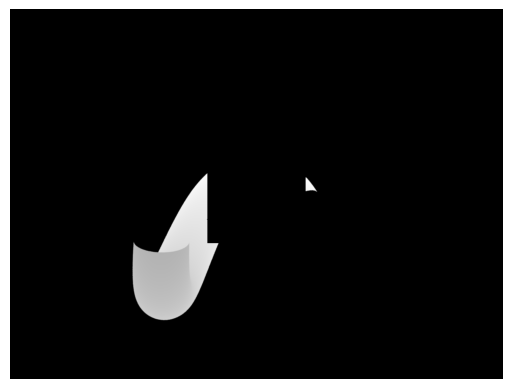

In [7]:
img_np = np.array(image)
print(img_np.max())
plt.axis("off")
plt.imshow(img_np / img_np.max()); # approximate sRGB tonemapping

In [8]:
# mi.util.write_bitmap("./bspline_mitsuba_optix_t_far.exr", image / 10.0)